In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Coursera.csv")
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


MISSING VALUES

In [ ]:
data.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


COLOUMN INFORMATIONS

In [ ]:
data['Difficulty Level'].value_counts()

,count
Difficulty Level,
Beginner,1444
Advanced,1005
Intermediate,837
Conversant,186
Not Calibrated,50


DROPPING COLOUMNS

In [ ]:
data = data[['Course Name', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills']]


DATA PREPROCESSING

In [ ]:
# Removing spaces between the words (Lambda funtions can be used as well)

data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')
data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')
data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')

#removing paranthesis from skills columns
data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

<ipython-input-196-c0fd358776f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Name'] = data['Course Name'].str.replace(' ',',')
<ipython-input-196-c0fd358776f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Name'] = data['Course Name'].str.replace(',,',',')
<ipython-input-196-c0fd358776f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
data.head()

,Course Name,Difficulty Level,Course Rating,Course Description,Skills
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,4.8,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,4.8,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...
2,"Silicon,Thin,Film,Solar,Cells",Advanced,4.1,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...
3,"Finance,for,Managers",Intermediate,4.8,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,4.6,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...


In [ ]:
data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills'] + data['Course Rating']
data.head()

,Course Name,Difficulty Level,Course Rating,Course Description,Skills,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,4.8,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,4.8,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,4.1,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",Intermediate,4.8,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,4.6,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
data['tags'].iloc[1]

'Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.Finance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy4.8'

NEW DATAFRAME

In [ ]:
new_df = data[['Course Name','tags']]
new_df.head()

,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
new_df['tags'] = data['tags'].str.replace(',',' ')
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


<ipython-input-201-95dfb35217c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = data['tags'].str.replace(',',' ')
<ipython-input-201-95dfb35217c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

<ipython-input-202-73f43793b1c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = data['Course Name'].str.replace(',',' ')
<ipython-input-202-73f43793b1c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [ ]:
new_df.shape
new_df.head()

,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy Business Model Canvas Analys...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsadvancedthis cour...
3,Finance for Managers,finance for managersintermediatewhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,retrieve data using single-table sql queriesbe...


TEXT VECTORIZATION

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()

STEMMING

In [ ]:
import nltk #for stemming process
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#defining the stemming function
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

<ipython-input-206-be18a4346d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


SIMILARITY MEASURE

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

CONTENT BASED FILTERING

In [ ]:
def recommend_content():
    course_name = input("Enter part of the course name for recommendations: ")

    # Filter courses that contain the input text in their name
    matching_courses = new_df[new_df['course_name'].str.contains(course_name, case=False, na=False)]

    # Check if there are any matching courses
    if matching_courses.empty:
        print("No courses found with that name. Please try a different keyword.")
        return

    #  matching course index
    course_index = matching_courses.index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    # Display recommendations
    print("Recommended Courses:")
    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

recommend_content()


Enter part of the course name for recommendations: Business Analytics for Decision Making
Recommended Courses:
Introduction to Business Analytics Communicating with Data
Communicating Business Analytics Results
Applying Data Analytics in Marketing
Introduction to Data Analytics for Business
Introduction to Business Analytics with R
Data Analysis and Reporting in SAS Visual Analytics


EVALUATION

In [ ]:

relevant_courses = {

    "Business English": ["Business English Basics", "3Business English Networking", "Business English Making Presentations",  "English for Effective Business Writing",  "Business English Planning & Negotiating", "English for Effective Business Speaking"],

    "3D Art and Audio Pipeline": ['Core Interaction Programming', '3D Interactions and Navigation', 'Creating Cutscenes in Unity', 'Character Setup and Animation', 'Integrating Scripts for Scene Interactions'],
    "3D CAD Application": ["3D CAD Fundamental", "3D Data Visualization for Science Communication"],
    "3D CAD Fundamental": ["3D CAD Application", "3D Graphics in Android: Sensors and VR"],
    "Write A Feature Length Screenplay For Film Or Television": [
        "Script Writing: Write a Pilot Episode for a TV or Web Series (Project-Centered Course)",
        "Write Your First Novel",
        "Transmedia Writing",
        "Writing Stories About Ourselves",
        "Creative Writing: The Craft of Style"],
     "Business Strategy: Business Model Canvas Analysis with Miro": [
        "Product and Service Development: Empathy Mapping with Miro",
        "Product Development: Customer Persona Development with Miro",
        "Product Development: Customer Journey Mapping with Miro",
        "Agile Projects: Develop Product Wireframe Prototypes in Miro",
        "Agile Projects: Defining Epics and Mapping Value with Taiga"],
    "3D Data Visualization for Science Communication": ["3D Data Visualization for Science Communication", "3D Interaction Design in Virtual Reality"],
    "3D Graphics in Android: Sensors and VR": ["3D Interaction Design in Virtual Reality", "3D Models for Virtual Reality"],
    "3D Interaction Design in Virtual Reality": ["3D Graphics in Android: Sensors and VR", "3D Models for Virtual Reality"],
    "Business Strategy": ["Business Growth Strategy", "Business Strategy in Practice (Project-centered Course)"],
    "Business Analytics for Decision Making": ["Business Intelligence Concepts, Tools, and Applications", "Business Application of Machine Learning and Artificial Intelligence in Healthcare","Communicating Business Analytics Results","Applying Data Analytics in Marketing","Introduction to Data Analytics for Business","Introduction to Business Analytics with R", "Data Analysis and Reporting in SAS Visual Analytics"],
    "Business Intelligence Concepts, Tools, and Applications": ["Business Analytics for Decision Making", "Business intelligence and data analytics: Generate insights"],
}



In [ ]:
# Dictionary to store evaluation metrics for the content-based model
content_model_metrics = {}

def evaluate_recommendations(course_name, recommended_courses):
    # Get relevant courses for the provided course name
    relevant = relevant_courses.get(course_name, [])

    # Convert lists to sets for easier calculation
    recommended_set = set(recommended_courses)
    relevant_set = set(relevant)

    # Calculate True Positives, False Positives, and False Negatives
    true_positives = len(recommended_set.intersection(relevant_set))
    false_positives = len(recommended_set - relevant_set)
    false_negatives = len(relevant_set - recommended_set)

    # Calculate Precision, Recall, and F1 Score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store the metrics in the content model dictionary
    content_model_metrics['Precision'] = precision
    content_model_metrics['Recall'] = recall
    content_model_metrics['F1-Score'] = f1_score


    print("______________________________________________________")

    # Print the evaluation metrics
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

# Modify the recommend function to evaluate recommendations
def recommend():
    course_name = input("Enter the course name for recommendations: ")
    course_index = new_df[new_df['course_name'] == course_name].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    recommended_courses = []
    for i in course_list:
        recommended_courses.append(new_df.iloc[i[0]].course_name)

    print("Recommended Courses:")
    for course in recommended_courses:
        print(course)

    # Evaluate and store the recommendations
    evaluate_recommendations(course_name, recommended_courses)

recommend()

# Print the stored metrics for confirmation
print("\nStored Content Model Metrics:")
print(content_model_metrics)


Enter the course name for recommendations: Business Analytics for Decision Making
Recommended Courses:
Introduction to Business Analytics Communicating with Data
Communicating Business Analytics Results
Applying Data Analytics in Marketing
Introduction to Data Analytics for Business
Introduction to Business Analytics with R
Data Analysis and Reporting in SAS Visual Analytics
______________________________________________________
Precision: 0.83
Recall: 0.71
F1 Score: 0.77

Stored Content Model Metrics:
{'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}


CONTEXT BASED

In [ ]:
def recommend_context():
    course_name = input("Enter part of the course name for recommendations: ")
    preferred_difficulty = input("Enter preferred difficulty level (Beginner, Intermediate, Advanced): ")

    # Filter courses that contain the input text in their name
    matching_courses = new_df[new_df['course_name'].str.contains(course_name, case=False, na=False)]

    # Check if there are any matching courses
    if matching_courses.empty:
        print("No courses found with that name. Please try a different keyword.")
        return

    # Select the first matching course index
    course_index = matching_courses.index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    # Filter recommendations based on preferred difficulty level
    recommended_courses = []
    for i in course_list:
        course_details = data.iloc[i[0]]
        if course_details['Difficulty Level'] == preferred_difficulty:
            recommended_courses.append(new_df.iloc[i[0]].course_name)

    # Display recommendations
    print("Recommended Courses:")
    if recommended_courses:
        for course in recommended_courses:
            print(course)
    else:
        print("No courses match the specified difficulty level.")

recommend_context()


Enter part of the course name for recommendations: AI Workflow
Enter preferred difficulty level (Beginner, Intermediate, Advanced): Advanced
Recommended Courses:
AI Workflow AI in Production
AI Workflow Enterprise Model Deployment
Supervised Learning Regression
Supervised Learning Regression
AI Workflow Business Priorities and Data Ingestion


EVALUATION

In [ ]:
relevant_cours = {

    "Business English": ["Business English Basics", "3Business English Networking", "Business English Making Presentations",  "English for Effective Business Writing",  "Business English Planning & Negotiating", "English for Effective Business Speaking"],



    "Business Strategy: Business Model Canvas Analysis with Miro": [
        "Product and Service Development: Empathy Mapping with Miro",
        "Product Development: Customer Persona Development with Miro",
        "Product Development: Customer Journey Mapping with Miro",
        "Agile Projects: Develop Product Wireframe Prototypes in Miro",
        "Agile Projects: Defining Epics and Mapping Value with Taiga"],
    "3D CAD Application": ["3D CAD Fundamental", "3D Data Visualization for Science Communication","3D Printing Hardware","3D Printing Hardware"],

    "Business Analytics for Decision Making": ["Applying Data Analytics in Marketing","Introduction to Business Analytics with R","Data Analysis and Reporting in SAS Visual Analytics","Introduction to Data Analytics for Business"],

    "Write A Feature Length Screenplay For Film Or Television": [
        "Script Writing: Write a Pilot Episode for a TV or Web Series",
        "Transmedia Writing",
        "Write Your First Novel",
        "Creative Writing for Beginners"
    ],
    "Business Strategy: Business Model Canvas Analysis with Miro": [
        "Product and Service Development: Empathy Mapping with Miro",
        "Agile Projects: Defining Epics and Mapping Value with Taiga",
        "Innovation Strategy",
        "Strategic Thinking and Problem Solving"
    ],
    "Silicon Thin Film Solar Cells": [
        "Physics of Silicon Solar Cells",
        "Introduction to Solar Cells",
        "Solar Energy Basics",
        "Renewable Energy Systems"
    ],
    "Finance for Managers": [
        "Finance for Non-Financial Managers",
        "Accounting and Finance for IT Professionals",
        "Corporate Finance Essentials",
        "Financial Markets and Investment Strategy"
    ],
    "Data Science Foundations": [
        "Introduction to Data Science",
        "Data Science and Machine Learning Bootcamp",
        "Python for Data Science",
        "Big Data Essentials"
    ],
    "Digital Marketing Strategy": [
        "Social Media Marketing",
        "Content Marketing Foundations",
        "SEO Basics",
        "Customer Analytics and Segmentation"
    ],
    "Machine Learning with Python": [
        "Deep Learning with TensorFlow",
        "AI for Everyone",
        "Applied Machine Learning",
        "Data Science and Machine Learning Bootcamp"
    ],
    "Artificial Intelligence in Business": [
        "AI for Managers",
        "Introduction to Artificial Intelligence",
        "Machine Learning for Business",
        "Business Intelligence and Data Analytics"
    ],
    "Project Management Principles": [
        "Agile Project Management",
        "Introduction to Project Management",
        "Project Management for Beginners",
        "Managing Project Risks"
    ],
    "Python Programming for Beginners": [
        "Introduction to Python",
        "Python Basics",
        "Advanced Python Programming",
        "Python Data Structures and Algorithms"
    ],
    "Blockchain and Cryptocurrency": [
        "Introduction to Blockchain",
        "Cryptocurrency Basics",
        "Blockchain Applications",
        "Fintech: Blockchain and Cryptocurrency"
    ],
    "Web Development Foundations": [
        "HTML and CSS Basics",
        "JavaScript Essentials",
        "Responsive Web Design",
        "Full Stack Web Development"
    ],
    "Cloud Computing Fundamentals": [
        "AWS Cloud Practitioner Essentials",
        "Introduction to Cloud Computing",
        "Azure Fundamentals",
        "Google Cloud Platform Basics"
    ],
    "Cybersecurity Essentials": [
        "Introduction to Cybersecurity",
        "Network Security",
        "Cybersecurity for Beginners",
        "Information Security Management"
    ],
    "Leadership and Influence": [
        "Effective Leadership Skills",
        "Emotional Intelligence in Leadership",
        "Leading Teams",
        "Communication and Influence in the Workplace"
    ],
    "Public Speaking for Beginners": [
        "Effective Communication Skills",
        "Presentation Skills",
        "Confidence in Public Speaking",
        "Engaging Your Audience"
    ],
    "Graphic Design Essentials": [
        "Introduction to Graphic Design",
        "Adobe Photoshop Basics",
        "Creating Visual Content",
        "Digital Illustration"
    ],
    "Introduction to Marketing Analytics": [
        "Data Analytics for Marketing",
        "Marketing Research Essentials",
        "Customer Analytics",
        "Marketing Strategy and Analytics"
    ],
    "Social Media Marketing Strategy": [
        "Digital Marketing Strategy",
        "Content Creation for Social Media",
        "Social Media Management",
        "Advanced Social Media Advertising"
    ],
    "Health and Wellness Coaching": [
        "Nutrition and Wellness Basics",
        "Exercise and Fitness Coaching",
        "Mental Health Awareness",
        "Lifestyle and Wellness Changes"
    ],
    "AI Capstone Project with Deep Learning": ["AI Workflow: Enterprise Model Deployment", "Applied AI with DeepLearning"],
    "AI Workflow" : [ "AI Workflow Enterprise Model Deployment","AI Workflow Business Priorities and Data Ingestion","AI Workflow AI in Production", "AI For Medical Treatment"],
    "AI For Everyone": ["An Introduction to Practical Deep Learning", "Applied AI with DeepLearning"],
    "AI for Medical Diagnosis": ["AI for Medical Prognosis", "AI For Medical Treatment"],
    "AI for Medical Prognosis": ["AI for Medical Diagnosis", "AI For Medical Treatment"],
    "AI For Medical Treatment": ["AI for Medical Diagnosis", "AI for Medical Prognosis"],
    "AI Workflow: AI in Production": ["AI Workflow: Data Analysis and Hypothesis Testing", "AI Workflow: Enterprise Model Deployment"],
    "AI Workflow: Business Priorities and Data Ingestion": ["AI Workflow: Data Analysis and Hypothesis Testing", "AI Workflow: Machine Learning, Visual Recognition and NLP"],
    "AI Workflow: Data Analysis and Hypothesis Testing": ["AI Workflow: Business Priorities and Data Ingestion", "AI Workflow: Feature Engineering and Bias Detection"],
    "AI Workflow: Enterprise Model Deployment": ["AI Workflow: AI in Production", "AI Workflow: Feature Engineering and Bias Detection"],
    "AI Workflow: Feature Engineering and Bias Detection": ["AI Workflow: Data Analysis and Hypothesis Testing", "AI Workflow: Machine Learning, Visual Recognition and NLP"],
    "AI Workflow: Machine Learning, Visual Recognition and NLP": ["AI Workflow: Business Priorities and Data Ingestion", "AI Capstone Project with Deep Learning"],
    "AIDS: Fear and Hope": ["Health Risks of Climate Change", "Global Health and Wellness"],
    "Air Pollution – a Global Threat to our Health": ["Health Risks of Climate Change", "Environmental Science and Sustainability"],
    "Algorithmic Thinking (Part 1)": ["Algorithmic Thinking (Part 2)", "Algorithmic Toolbox"],
    "Algorithmic Thinking (Part 2)": ["Algorithmic Thinking (Part 1)", "Algorithmic Toolbox"],
    "Algorithmic Toolbox": ["Algorithms on Graphs", "Algorithms on Strings"],
    "Algorithms for DNA Sequencing": ["Algorithms on Strings", "Bioinformatics"],
    "Algorithms on Graphs": ["Algorithmic Toolbox", "Algorithms on Strings"],
    "Algorithms on Strings": ["Algorithmic Toolbox", "Algorithms for DNA Sequencing"],
    "Algorithms, Part I": ["Algorithms, Part II", "Algorithmic Thinking (Part 1)"],
    "Algorithms, Part II": ["Algorithms, Part I", "Algorithmic Thinking (Part 2)"],
    "Alternative Approaches to Valuation and Investment": ["Investment Strategies", "Corporate Valuation"],
    "Amazon DynamoDB: Building NoSQL Database-Driven Applications": ["AWS Fundamentals: Building Serverless Applications", "Database Design and Management"],
    "America Through Foreign Eyes": ["American Deaf Culture", "Understanding Global Perspectives"],
    "American Contract Law I": ["American Contract Law II", "Basics of American Law"],
    "American Contract Law II": ["American Contract Law I", "Introduction to American Legal Systems"],
    "American Deaf Culture": ["Introduction to Sociology", "Culture and Identity"],
    "America's Unwritten Constitution": ["America's Written Constitution", "American Law and Society"],
    "America's Written Constitution": ["America's Unwritten Constitution", "Constitutional Law"],
    "An Introduction to Accessibility and Inclusive Design": ["User Experience (UX) Design", "Inclusive Product Design"],
    "An Introduction to Consumer Neuroscience & Neuromarketing": ["Psychology of Advertising", "Behavioral Economics"],
    "An Introduction to Global Health": ["Health Risks of Climate Change", "AIDS: Fear and Hope"],
    "An Introduction to Interactive Programming in Python (Part 1)": ["An Introduction to Interactive Programming in Python (Part 2)", "Python for Data Science"],
    "An Introduction to Interactive Programming in Python (Part 2)": ["An Introduction to Interactive Programming in Python (Part 1)", "Python for Machine Learning"],
    "An Introduction to Practical Deep Learning": ["Applied AI with DeepLearning", "Deep Learning Specialization"],
    "An Introduction to the U.S. Food System: Perspectives from Public Health": ["Public Health and Wellness", "Nutrition and Food Security"],
    "An Intuitive Introduction to Probability": ["Introduction to Statistics", "Data Science Basics"],
    "Analysing Complexity": ["Big Data Analysis", "Complex Systems"],
    "Analysis for Business Systems": ["Business Strategy Analysis", "Systems Design for Business"],
    "Analysis of Algorithms": ["Data Structures and Algorithms", "Algorithmic Complexity"],
    "Analysis of Business Problems": ["Decision Making in Business", "Business Analytics"],
    "Analysis of Variance with ANOVA in Google Sheets": ["Introduction to Statistics", "Data Analysis Techniques"],
    "Analytic Combinatorics": ["Algorithmic Thinking", "Advanced Mathematics"],
    "Analyze Box Office Data with Plotly and Python": ["Data Visualization Techniques", "Python for Data Analysis"]
}



In [ ]:
# Dictionary to store evaluation metrics for the context-based model
context_model_metrics = {}

def evaluate_recommendations(course_name, recommended_courses):
    # Get relevant courses for the provided course name
    relevant = relevant_cours.get(course_name, [])

    # Convert lists to sets for easier calculation
    recommended_set = set(recommended_courses)
    relevant_set = set(relevant)

    # Calculate True Positives, False Positives, and False Negatives
    true_positives = len(recommended_set.intersection(relevant_set))
    false_positives = len(recommended_set - relevant_set)
    false_negatives = len(relevant_set - recommended_set)

    # Calculate Precision, Recall, and F1 Score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store the metrics in the context model dictionary
    context_model_metrics['Precision'] = precision
    context_model_metrics['Recall'] = recall
    context_model_metrics['F1-Score'] = f1_score

    print("______________________________________________________")

    # Print the evaluation metrics
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

# Modify the recommend function to include evaluation
def recommend():
    course_name = input("Enter part of the course name for recommendations: ")
    preferred_difficulty = input("Enter preferred difficulty level (Beginner, Intermediate, Advanced): ")

    # Filter courses that contain the input text in their name
    matching_courses = new_df[new_df['course_name'].str.contains(course_name, case=False, na=False)]

    if matching_courses.empty:
        print("No courses found with that name. Please try a different keyword.")
        return

    # Select the first matching course index
    course_index = matching_courses.index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    recommended_courses = []
    for i in course_list:
        course_details = data.iloc[i[0]]
        if course_details['Difficulty Level'] == preferred_difficulty:
            recommended_courses.append(new_df.iloc[i[0]].course_name)

    print("Recommended Courses:")
    if recommended_courses:
        for course in recommended_courses:
            print(course)
    else:
        print("No courses match the specified difficulty level.")

    # Evaluate and store the recommendations
    evaluate_recommendations(course_name, recommended_courses)

recommend()

# Print the stored metrics for confirmation
print("\nStored Context Model Metrics:")
print(context_model_metrics)


Enter part of the course name for recommendations: AI Workflow
Enter preferred difficulty level (Beginner, Intermediate, Advanced): Advanced
Recommended Courses:
AI Workflow AI in Production
AI Workflow Enterprise Model Deployment
Supervised Learning Regression
Supervised Learning Regression
AI Workflow Business Priorities and Data Ingestion
______________________________________________________
Precision: 0.75
Recall: 0.75
F1 Score: 0.75

Stored Context Model Metrics:
{'Precision': 0.75, 'Recall': 0.75, 'F1-Score': 0.75}


HYBRID MODEL

In [ ]:
def hybrid_recommend():
    course_name = input("Enter part of the course name for recommendations: ")
    preferred_difficulty = input("Enter preferred difficulty level (Beginner, Intermediate, Advanced): ")

    # Step 1: Content-based filtering - Find courses that contain the input text in their name
    matching_courses = new_df[new_df['course_name'].str.contains(course_name, case=False, na=False)]

    # Check if there are any matching courses
    if matching_courses.empty:
        print("No courses found with that name. Please try a different keyword.")
        return

    # Select the first matching course index
    course_index = matching_courses.index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    # Step 2: Context-based filtering - Refine recommendations by preferred difficulty level
    recommended_courses = []
    for i in course_list:
        # Get the course details from the original 'data' DataFrame using the index 'i[0]'
        course_details = data.iloc[i[0]]
        # Combine content and context filtering
        if course_details['Difficulty Level'] == preferred_difficulty:
            # Append the course name from 'new_df' using the index 'i[0]' to the recommended courses list
            recommended_courses.append(new_df.iloc[i[0]].course_name)

    # Display recommendations
    print("Recommended Courses:")
    if recommended_courses:
        for course in recommended_courses:
            print(course)
    else:
        print("No courses match the specified difficulty level.")

hybrid_recommend()

Enter part of the course name for recommendations: 3D CAD Application
Enter preferred difficulty level (Beginner, Intermediate, Advanced): Advanced
Recommended Courses:
3D Printing Hardware
3D Printing Software


In [ ]:
rec_courses = {
    "Business English": ["Business English Basics", "3Business English Networking", "Business English Making Presentations",  "English for Effective Business Writing",  "Business English Planning & Negotiating", "English for Effective Business Speaking"],
    "Business Strategy: Business Model Canvas Analysis with Miro": [
        "Product and Service Development: Empathy Mapping with Miro",
        "Product Development: Customer Persona Development with Miro",
        "Product Development: Customer Journey Mapping with Miro",
        "Agile Projects: Develop Product Wireframe Prototypes in Miro",
        "Agile Projects: Defining Epics and Mapping Value with Taiga"],
    "3D CAD Application": ["3D CAD Fundamental","3D Model Creation with Autodesk Fusion 360", "3D Printing Hardware","3D Printing Hardware","3D Model Creation with Autodesk Fusion 360","The 3D Printing Revolution","BIM Application for Engineers"],

    "Business Analytics for Decision Making": ["Applying Data Analytics in Marketing","Introduction to Business Analytics with R","Data Analysis and Reporting in SAS Visual Analytics","Introduction to Data Analytics for Business"],

}

In [ ]:
# Dictionary to store evaluation metrics for the hybrid model
hybrid_model_metrics = {}

def hybrid_recommend():
    course_name = input("Enter the course name for hybrid recommendations: ")

    # Get the course index for the selected course name
    course_index = new_df[new_df['course_name'] == course_name].index[0]
    distances = similarity[course_index]  # Assuming `hybrid_similarity` is the hybrid similarity matrix
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    rec_courses = [new_df.iloc[i[0]].course_name for i in course_list]

    print("Hybrid Recommended Courses:")
    for course in rec_courses:
        print(course)

    # Evaluate and store the hybrid recommendations
    evaluate_recommendations(course_name, rec_courses)

    # Store the metrics in the hybrid model dictionary
    hybrid_model_metrics['Precision'] = content_model_metrics['Precision']
    hybrid_model_metrics['Recall'] = content_model_metrics['Recall']
    hybrid_model_metrics['F1-Score'] = content_model_metrics['F1-Score']

# Call the hybrid recommendation and evaluation
hybrid_recommend()

# Print the stored metrics for confirmation
print("\nStored Hybrid Model Metrics:")
print(hybrid_model_metrics)


Enter the course name for hybrid recommendations: 3D CAD Application
Hybrid Recommended Courses:
3D CAD Fundamental
3D Printing Hardware
The 3D Printing Revolution
BIM Application for Engineers
3D Model Creation with Autodesk Fusion 360
3D Printing Software

Stored Hybrid Model Metrics:
{'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}


VISUALIZATION

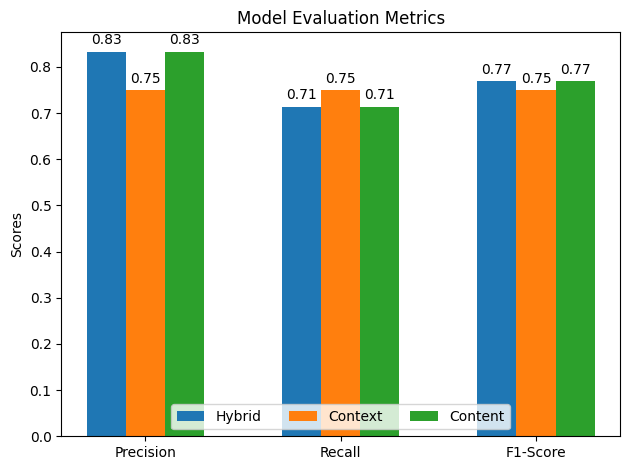

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Hybrid, Context, and Content models
hybrid_metrics = {'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}
context_metrics = {'Precision': 0.75, 'Recall': 0.75, 'F1-Score': 0.75}
content_metrics = {'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}

# Model names and metrics
models = ['Hybrid', 'Context', 'Content']
metrics = ['Precision', 'Recall', 'F1-Score']

# Data for the bar chart
data = [
    [hybrid_metrics[metric] for metric in metrics],
    [context_metrics[metric] for metric in metrics],
    [content_metrics[metric] for metric in metrics]
]

# Create the bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, data[0], width, label='Hybrid')
rects2 = ax.bar(x, data[1], width, label='Context')
rects3 = ax.bar(x + width, data[2], width, label='Content')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower center', ncol=3)

# Add value labels to the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),  # Format to two decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


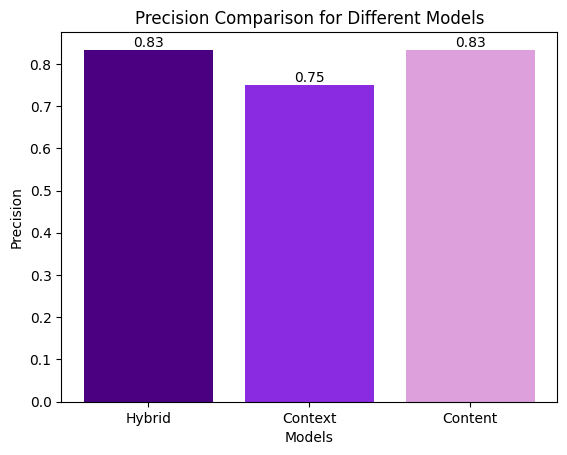

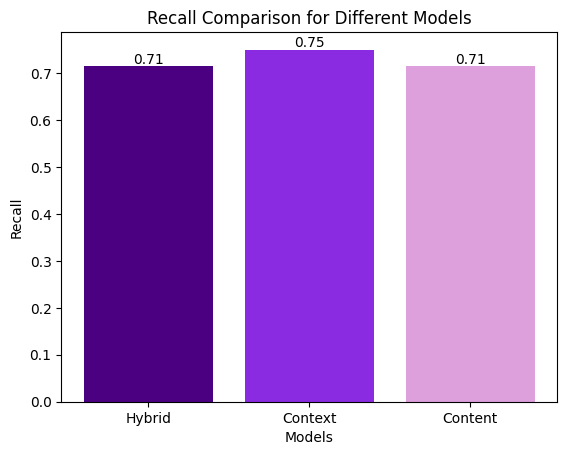

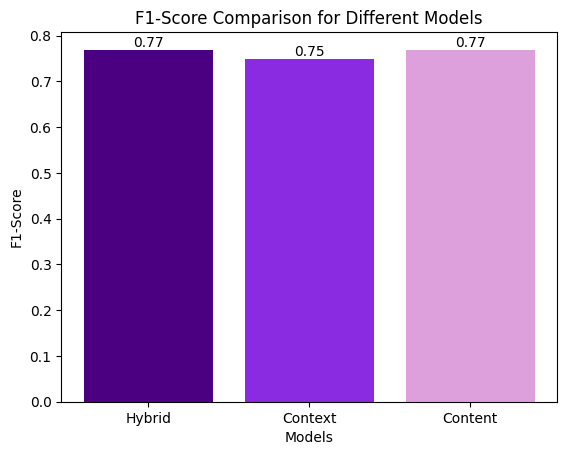

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Hybrid, Context, and Content models
hybrid_metrics = {'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}
context_metrics = {'Precision': 0.75, 'Recall': 0.75, 'F1-Score': 0.75}
content_metrics = {'Precision': 0.8333333333333334, 'Recall': 0.7142857142857143, 'F1-Score': 0.7692307692307692}

# Model names and metrics
models = ['Hybrid', 'Context', 'Content']
metrics = ['Precision', 'Recall', 'F1-Score']

# Create separate bar charts for each metric
for metric in metrics:
    fig, ax = plt.subplots()

    # Get the values for the current metric for each model
    values = [hybrid_metrics[metric], context_metrics[metric], content_metrics[metric]]

    # Plot the bar chart
    bars = ax.bar(models, values, color=['#4B0082', '#8A2BE2', '#DDA0DD'])

    # Set labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison for Different Models')

    # Add value labels to the bars
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    plt.show()

